In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Modelling
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor   
# Evaluate
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error 

In [ ]:
# Load dataset

from google.colab import drive
drive.mount('/content/drive')

files = "/content/drive/MyDrive/Github/case_cost_prediction_train.csv"
df = pd.read_csv(files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Understanding

### Collecting Data

In [ ]:
df.head()

,row_id,tglpelayanan,kddati2,tkp,peserta,a,b,c,cb,d,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
0,1,2014-04-01 00:00:00,332,40,179530,0,0,1,0,1,...,0,0,0,0,0,0,0,0,266,3.597440e+06
1,2,2016-11-01 00:00:00,54,40,104782,0,1,0,0,0,...,0,0,1,0,0,0,1,1,2453,4.951008e+06
2,3,2016-05-01 00:00:00,323,30,280645,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1690,1.984208e+05
3,4,2018-11-01 00:00:00,318,40,178685,0,1,0,0,0,...,0,0,0,0,0,0,0,3,1321,4.008756e+06
4,5,2019-10-01 00:00:00,150,30,1199321,1,0,1,0,0,...,1,0,0,0,0,1,0,5,73056,3.072272e+05


In [ ]:
df.columns

Index(['row_id', 'tglpelayanan', 'kddati2', 'tkp', 'peserta', 'a', 'b', 'c',
       'cb', 'd', 'ds', 'gd', 'hd', 'i1', 'i2', 'i3', 'i4', 'kb', 'kc', 'kg',
       'ki', 'kj', 'kk', 'kl', 'km', 'ko', 'kp', 'kt', 'ku', 's', 'sa', 'sb',
       'sc', 'sd', 'case', 'unit_cost'],
      dtype='object')

In [ ]:
df.nunique()

row_id          57971
tglpelayanan       90
kddati2           490
tkp                 2
peserta         36517
a                   3
b                   9
c                   7
cb                  2
d                   6
ds                  1
gd                 11
hd                  7
i1                  2
i2                  3
i3                  4
i4                  4
kb                  3
kc                  2
kg                  5
ki                 12
kj                  3
kk                  2
kl                  7
km                  7
ko                  2
kp                  3
kt                  2
ku                  2
s                   6
sa                  2
sb                 10
sc                 25
sd                 11
case            15332
unit_cost       57945
dtype: int64

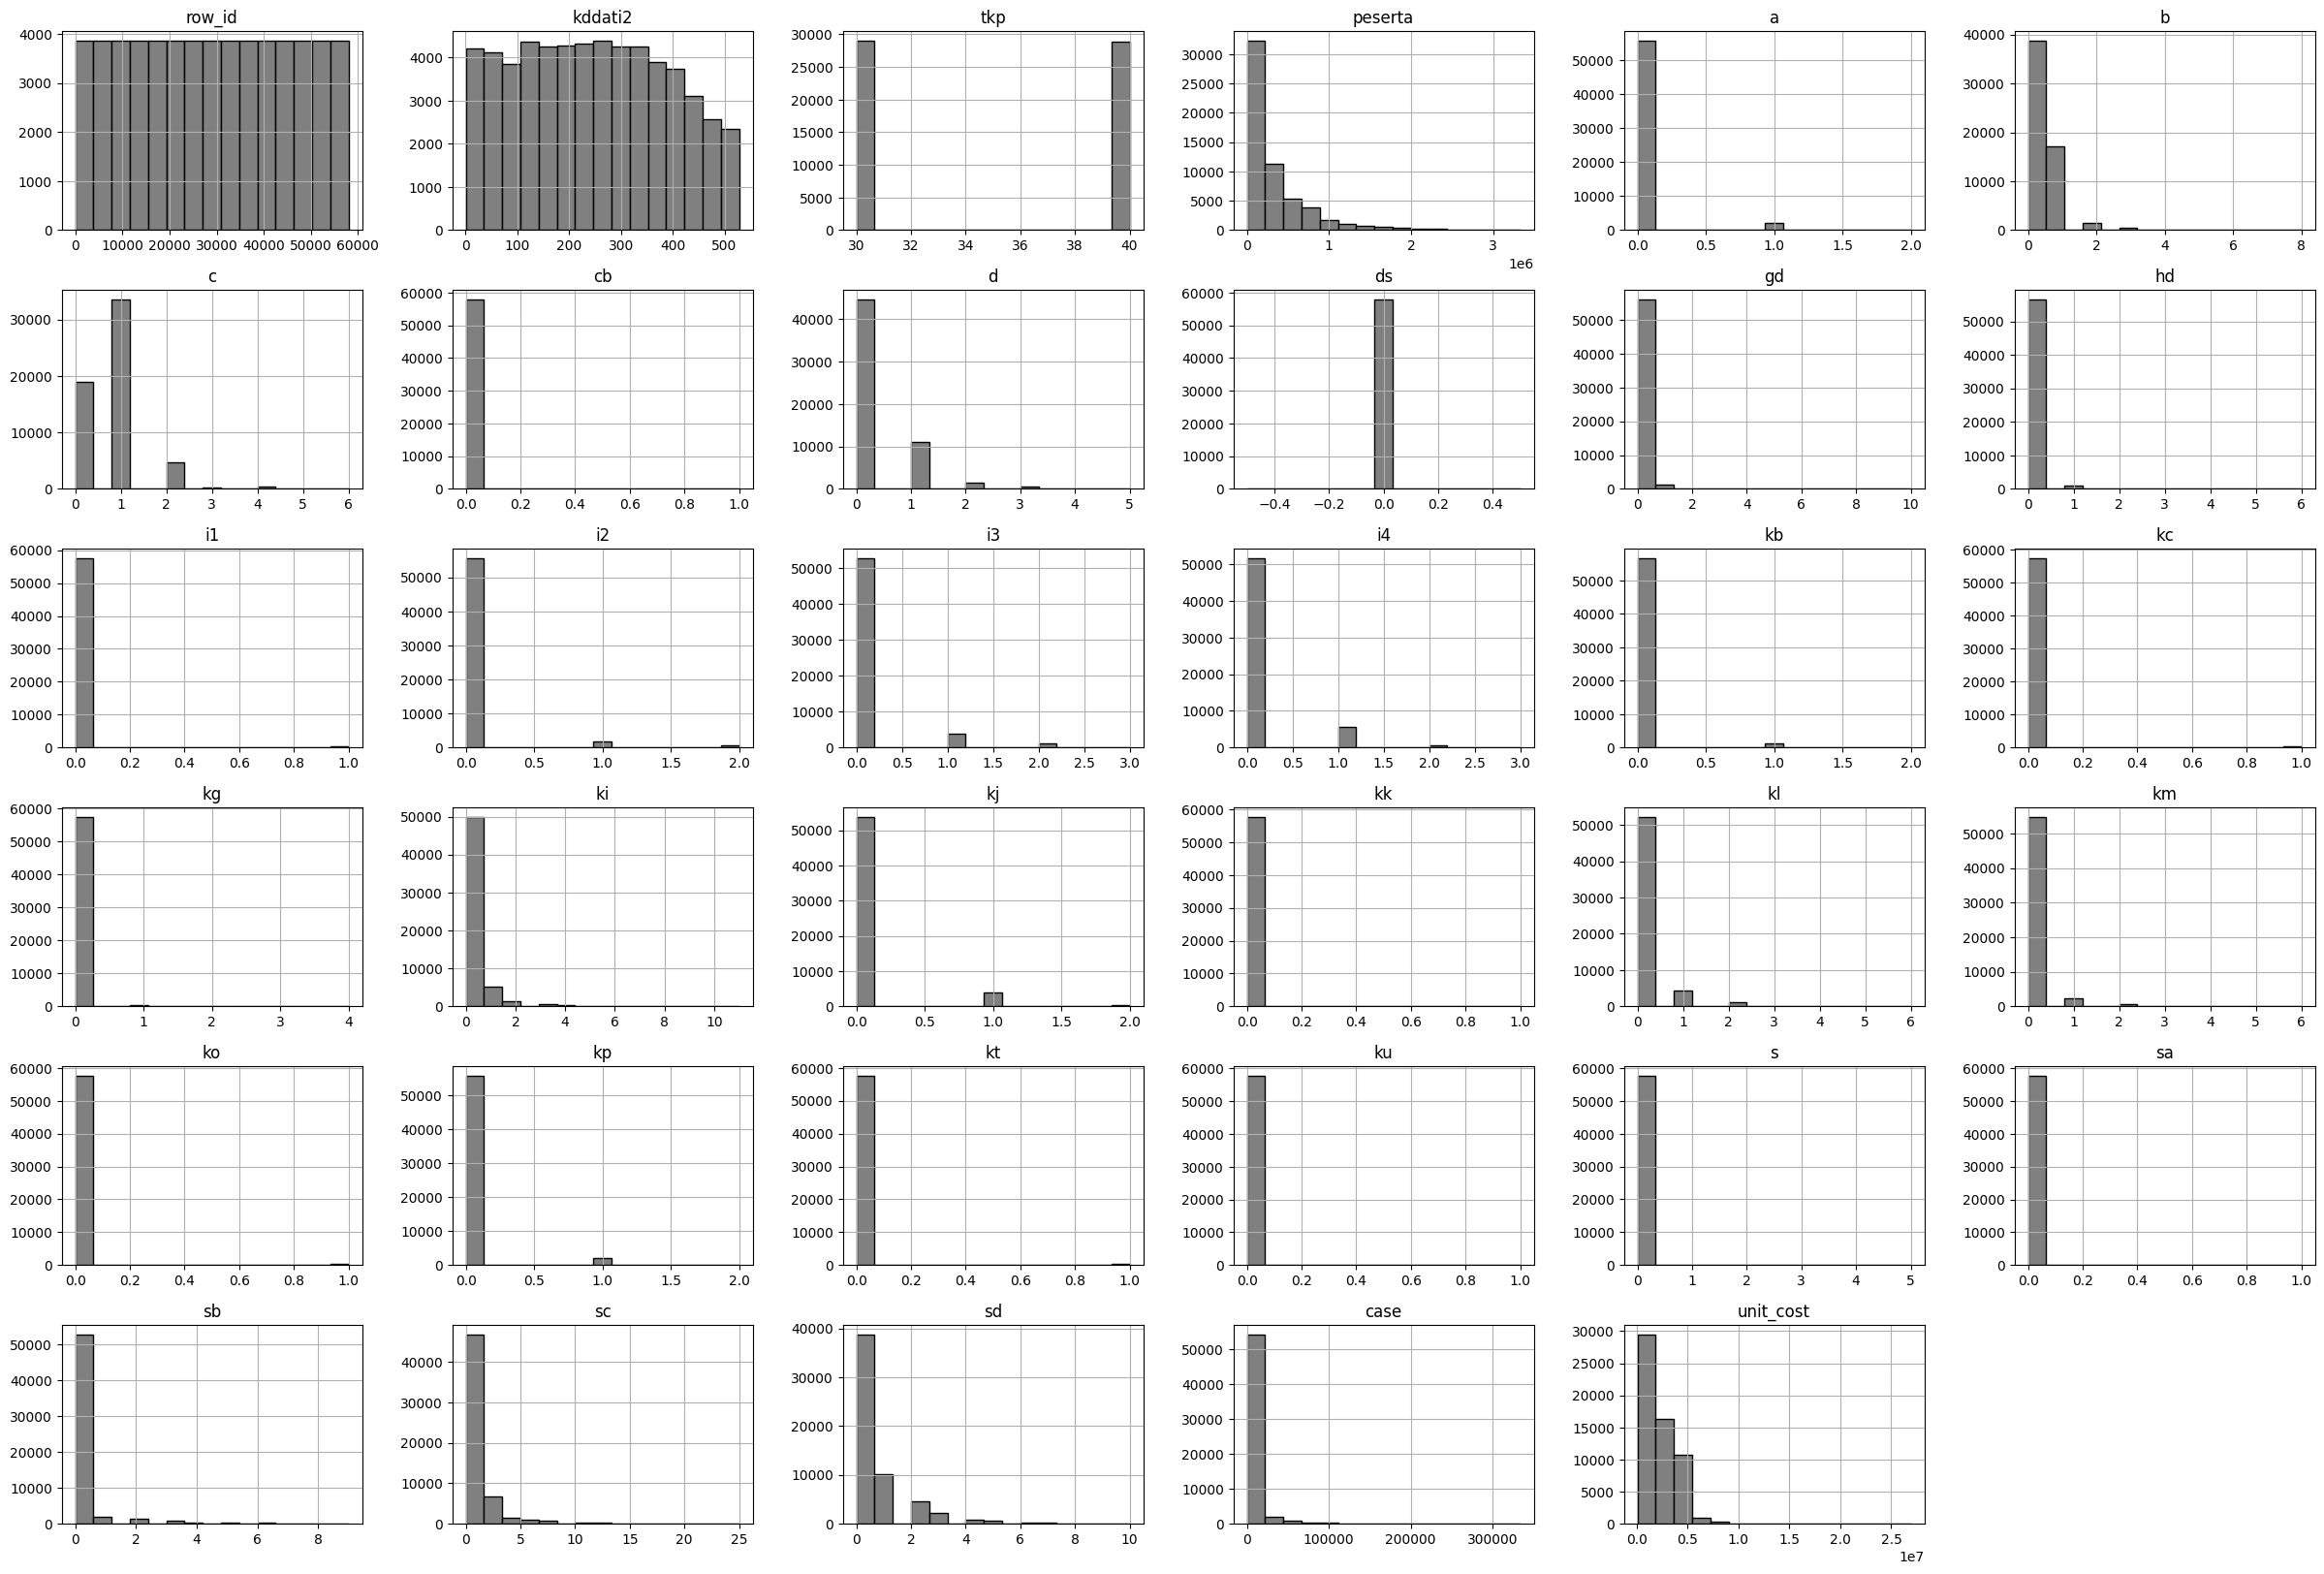

In [ ]:
## menampilkan histogram untuk semua atribut
df.hist(edgecolor = 'black', bins = 15, figsize = (30, 20), color='gray');

### Describe Data

In [ ]:
df.describe(include = "all")

,row_id,tglpelayanan,kddati2,tkp,peserta,a,b,c,cb,d,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
count,57971.000000,57971,57971.000000,57971.000000,5.797100e+04,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,...,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,5.797100e+04
unique,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2017-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28986.000000,NaN,246.423125,34.990081,3.562209e+05,0.041538,0.388574,0.788894,0.000380,0.281710,...,0.039899,0.004330,0.001829,0.004123,0.002018,0.228476,0.953028,0.644943,6539.418451,1.961092e+06
std,16734.930565,NaN,143.447935,5.000033,4.120323e+05,0.210390,0.660382,0.679786,0.019477,0.595284,...,0.210092,0.065659,0.042722,0.082443,0.044880,0.925357,2.225974,1.234201,17607.280021,1.889367e+06
min,1.000000,NaN,1.000000,30.000000,8.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+05
25%,14493.500000,NaN,125.000000,30.000000,1.127735e+05,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,424.000000,2.336742e+05
50%,28986.000000,NaN,243.000000,30.000000,1.975800e+05,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1359.000000,6.547994e+05
75%,43478.500000,NaN,362.000000,40.000000,4.386935e+05,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4583.000000,3.531702e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57971 entries, 0 to 57970
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row_id        57971 non-null  int64  
 1   tglpelayanan  57971 non-null  object 
 2   kddati2       57971 non-null  int64  
 3   tkp           57971 non-null  int64  
 4   peserta       57971 non-null  int64  
 5   a             57971 non-null  int64  
 6   b             57971 non-null  int64  
 7   c             57971 non-null  int64  
 8   cb            57971 non-null  int64  
 9   d             57971 non-null  int64  
 10  ds            57971 non-null  int64  
 11  gd            57971 non-null  int64  
 12  hd            57971 non-null  int64  
 13  i1            57971 non-null  int64  
 14  i2            57971 non-null  int64  
 15  i3            57971 non-null  int64  
 16  i4            57971 non-null  int64  
 17  kb            57971 non-null  int64  
 18  kc            57971 non-nu

In [ ]:
df.size

2086956

In [ ]:
df.shape

(57971, 36)

### Validation Data

In [ ]:
# Checking Missing Value wih Boolean
df.isnull().any()

row_id          False
tglpelayanan    False
kddati2         False
tkp             False
peserta         False
a               False
b               False
c               False
cb              False
d               False
ds              False
gd              False
hd              False
i1              False
i2              False
i3              False
i4              False
kb              False
kc              False
kg              False
ki              False
kj              False
kk              False
kl              False
km              False
ko              False
kp              False
kt              False
ku              False
s               False
sa              False
sb              False
sc              False
sd              False
case            False
unit_cost       False
dtype: bool

In [ ]:
# Count Missing Value 
df.isnull().sum()

row_id          0
tglpelayanan    0
kddati2         0
tkp             0
peserta         0
a               0
b               0
c               0
cb              0
d               0
ds              0
gd              0
hd              0
i1              0
i2              0
i3              0
i4              0
kb              0
kc              0
kg              0
ki              0
kj              0
kk              0
kl              0
km              0
ko              0
kp              0
kt              0
ku              0
s               0
sa              0
sb              0
sc              0
sd              0
case            0
unit_cost       0
dtype: int64

In [ ]:
# Checking Duplicate Value
a = df.duplicated().any()
b = df.duplicated().sum()
if a == True:
  print("Num of duplicate data: ", a)
else:
  print("No duplicate data")

No duplicate data


## Data Preparation

### Data Selection (Feature Selection)

<ipython-input-14-e85ec7cf9881>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=.3, fmt= '.2f',ax=ax, cmap='viridis')


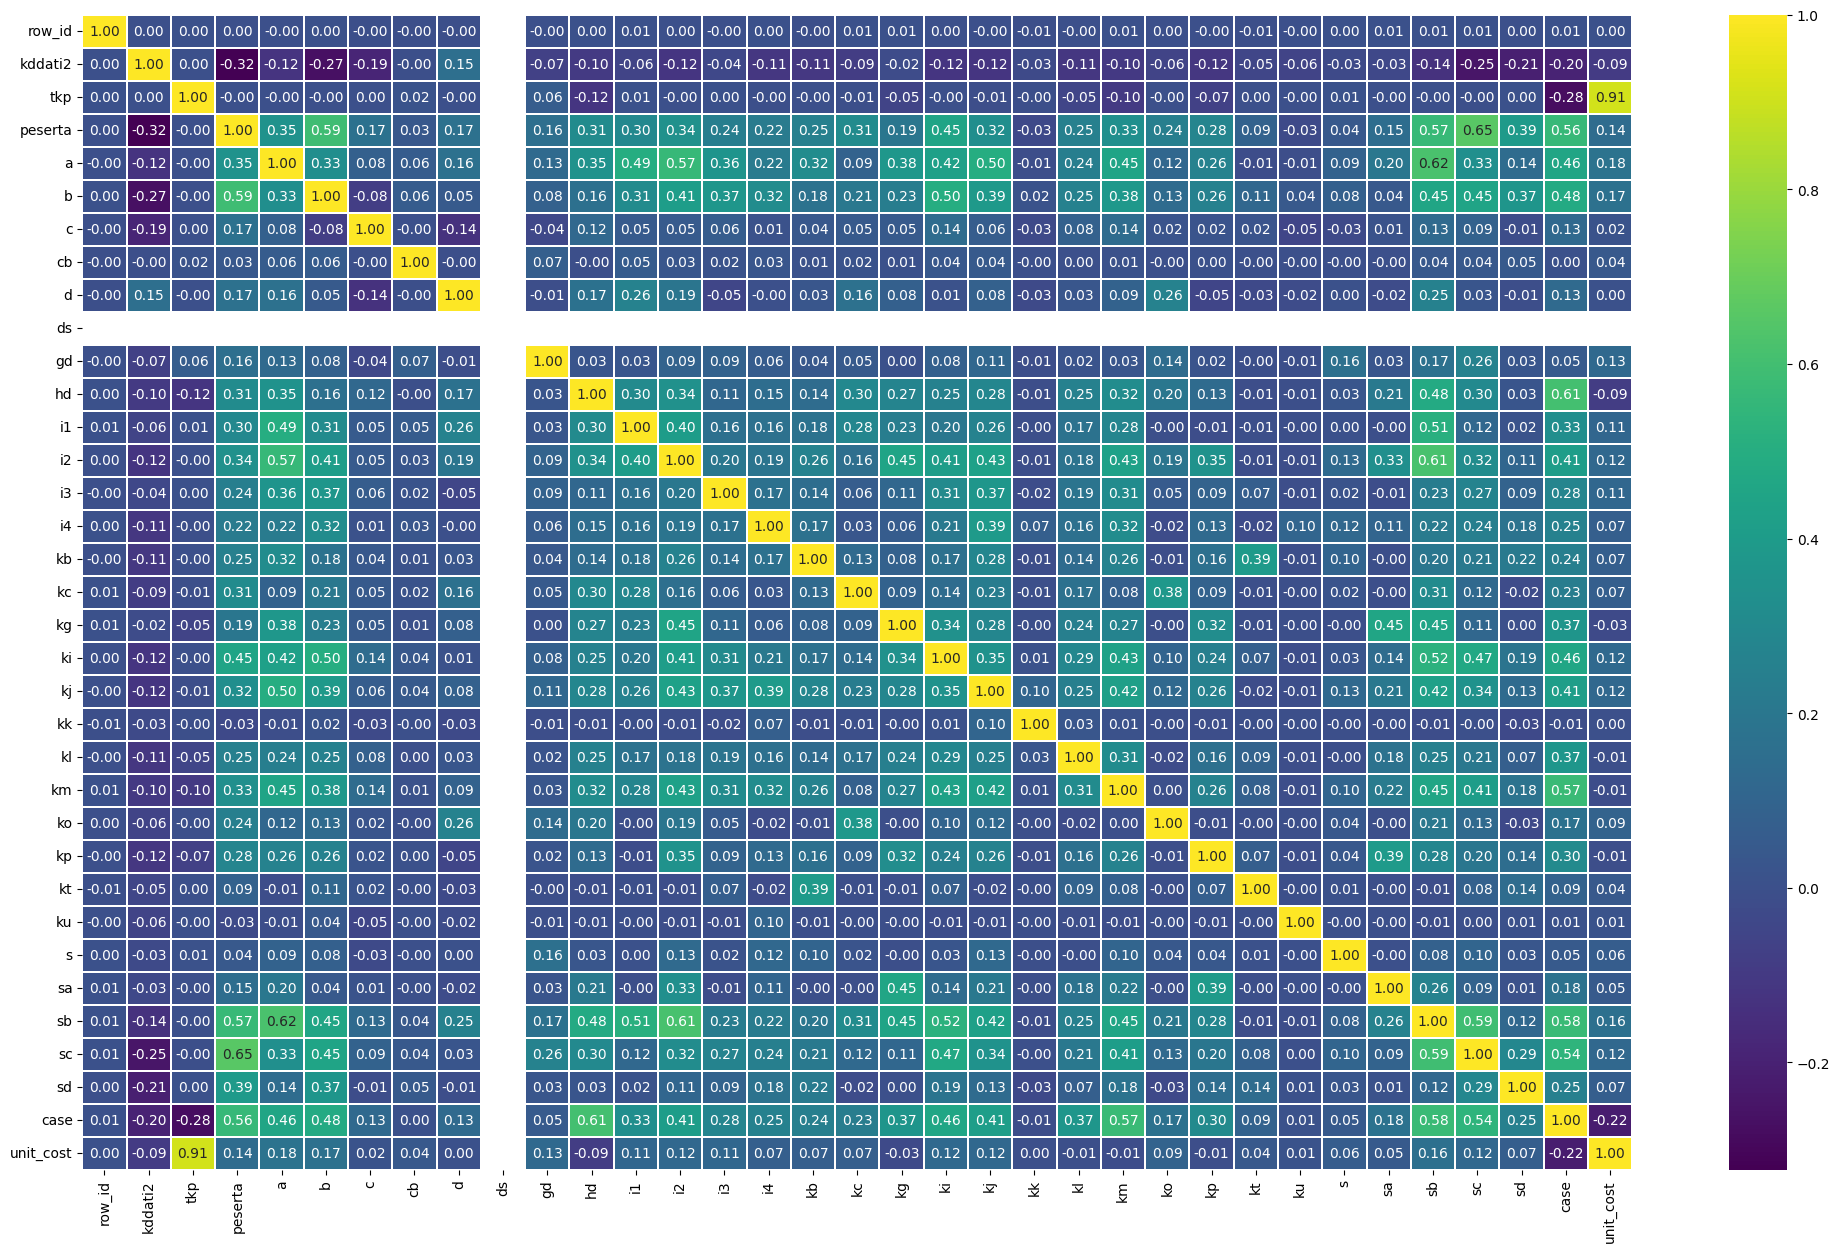

In [ ]:
# Matrix Correlation with Heatmap
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.3, fmt= '.2f',ax=ax, cmap='viridis')
plt.show()

In [ ]:
df["ds"].head()

0    0
1    0
2    0
3    0
4    0
Name: ds, dtype: int64

In [ ]:
df["ds"].nunique()

1

In [ ]:
# Feature selection or Dropping ds attributes
# coz this feature didnt have correlation with any atribute 
# or ds 'value' didnt have variability
df_drop = df.drop('ds', axis = 1)

In [ ]:
df_drop.head()

,row_id,tglpelayanan,kddati2,tkp,peserta,a,b,c,cb,d,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
0,1,2014-04-01 00:00:00,332,40,179530,0,0,1,0,1,...,0,0,0,0,0,0,0,0,266,3.597440e+06
1,2,2016-11-01 00:00:00,54,40,104782,0,1,0,0,0,...,0,0,1,0,0,0,1,1,2453,4.951008e+06
2,3,2016-05-01 00:00:00,323,30,280645,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1690,1.984208e+05
3,4,2018-11-01 00:00:00,318,40,178685,0,1,0,0,0,...,0,0,0,0,0,0,0,3,1321,4.008756e+06
4,5,2019-10-01 00:00:00,150,30,1199321,1,0,1,0,0,...,1,0,0,0,0,1,0,5,73056,3.072272e+05


#### Checking Outlier

In [ ]:
def find_outliers_tukey(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [ ]:
peserta_indices, peserta_values = find_outliers_tukey(df_drop['peserta'])
print("Outliers for peserta :", len(peserta_values))
print(np.sort(peserta_values))

case_indices, case_values = find_outliers_tukey(df_drop['case'])
print("Outliers for case :", len(case_values))
print(np.sort(case_values))

unit_cost_indices, unit_cost_values = find_outliers_tukey(df_drop['unit_cost'])
print("Outliers for unit_cost :", len(unit_cost_values))
print(np.sort(unit_cost_values))

Outliers for peserta : 4659
[ 927671  927671  927788 ... 3298207 3328509 3328509]
Outliers for case : 7493
[ 10823  10825  10826 ... 314724 319056 333441]
Outliers for unit_cost : 173
[ 8486308.97187197  8492569.13483146  8495547.66866792  8496678.48692811
  8505934.448737    8510106.99221854  8524654.54609331  8531089.47104372
  8579462.84689837  8580829.53926398  8581299.23313461  8607378.73831776
  8622449.62590799  8638803.55653482  8640000.          8696560.43206997
  8707003.38309754  8710747.13392857  8775947.39910314  8818004.63006606
  8851669.7029703   8852383.38334556  8863081.94482955  8931520.81137627
  8951797.52906029  8961317.2139745   8993765.46606335  8999926.59948097
  9026521.55413527  9031564.22243902  9048079.40611354  9113110.16735476
  9124856.58420742  9317511.25852725  9327950.39770115  9377640.65291191
  9447612.28383758  9450936.95153314  9469926.130527    9493356.15393374
  9498797.38319608  9499311.94115872  9512236.94348611  9528670.5758427
  9528939.7280

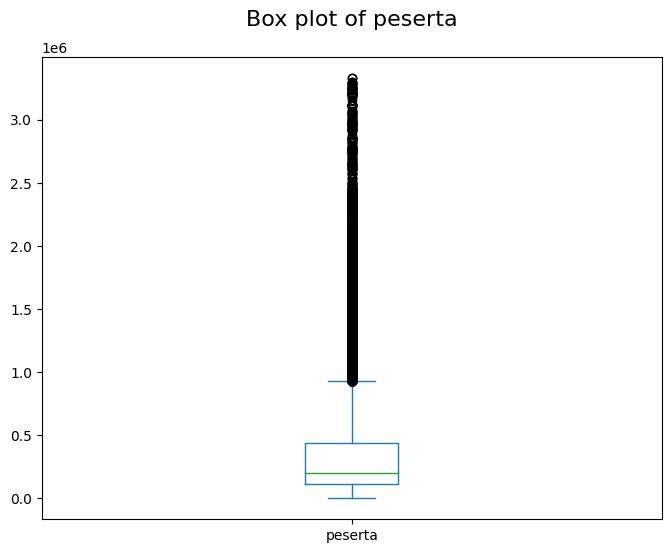

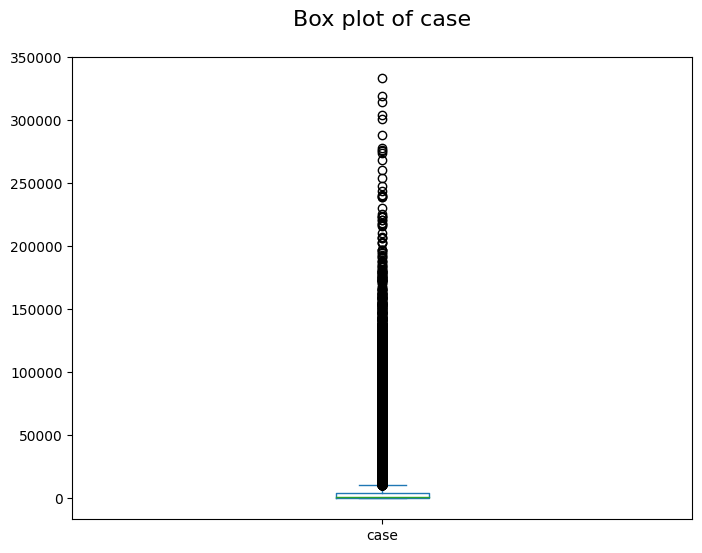

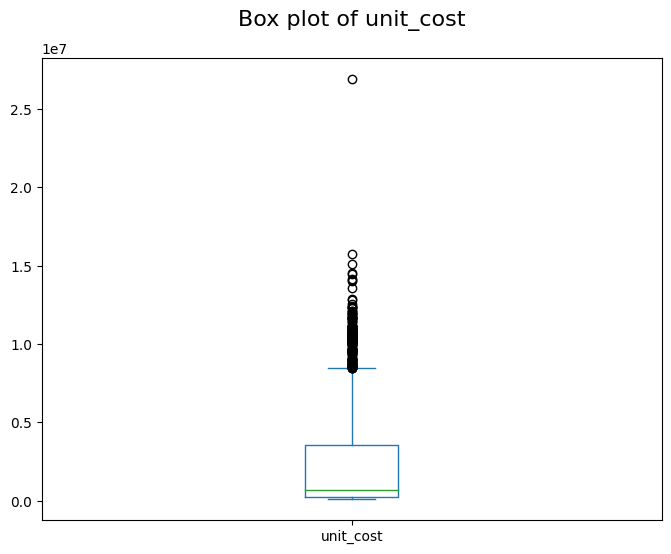

In [ ]:
df_drop['peserta'].plot(kind='box', figsize=(8, 6))
plt.title('Box plot of peserta\n', size=16)
plt.show()

df_drop['case'].plot(kind='box', figsize=(8, 6))
plt.title('Box plot of case\n', size=16)
plt.show()

df_drop['unit_cost'].plot(kind='box', figsize=(8, 6))
plt.title('Box plot of unit_cost\n', size=16)
plt.show()

In [ ]:
peserta_Q1=df_drop['peserta'].quantile(0.25)
peserta_Q3=df_drop['peserta'].quantile(0.75)
peserta_IQR=peserta_Q3-peserta_Q1
print("Peserta\nIQR : ", peserta_IQR)
peserta_floor = peserta_Q1 - 1.5*peserta_IQR
peserta_ceiling = peserta_Q3 + 1.5*peserta_IQR
print("floor : ", peserta_floor)
print("ceiling : ", peserta_ceiling)

case_Q1=df_drop['case'].quantile(0.25)
case_Q3=df_drop['case'].quantile(0.75)
case_IQR=case_Q3-case_Q1
print("\ncase\nIQR : ", case_IQR)
case_floor = case_Q1 - 1.5*case_IQR
case_ceiling = case_Q3 + 1.5*case_IQR
print("floor : ", case_floor)
print("ceiling : ", case_ceiling)

unit_cost_Q1=df_drop['unit_cost'].quantile(0.25)
unit_cost_Q3=df_drop['unit_cost'].quantile(0.75)
unit_cost_IQR=unit_cost_Q3-unit_cost_Q1
print("\nunit_cost\nIQR : ", unit_cost_IQR)
unit_cost_floor = unit_cost_Q1 - 1.5*unit_cost_IQR
unit_cost_ceiling = unit_cost_Q3 + 1.5*unit_cost_IQR
print("floor : ", unit_cost_floor)
print("ceiling : ", unit_cost_ceiling)

Peserta
IQR :  325920.0
floor :  -376106.5
ceiling :  927573.5

case
IQR :  4159.0
floor :  -5814.5
ceiling :  10821.5

unit_cost
IQR :  3298027.4123714245
floor :  -4713366.953268581
ceiling :  8478742.696217116


In [ ]:
df_check = df_drop[((df_drop['peserta'] > peserta_floor) & (df_drop['peserta'] < peserta_ceiling)) & ((df_drop['case'] > case_floor) & (df_drop['case'] < case_ceiling)) & 
                         ((df_drop['unit_cost'] > unit_cost_floor) & (df_drop['unit_cost'] < unit_cost_ceiling))]

In [ ]:
df_check

,row_id,tglpelayanan,kddati2,tkp,peserta,a,b,c,cb,d,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
0,1,2014-04-01 00:00:00,332,40,179530,0,0,1,0,1,...,0,0,0,0,0,0,0,0,266,3.597440e+06
1,2,2016-11-01 00:00:00,54,40,104782,0,1,0,0,0,...,0,0,1,0,0,0,1,1,2453,4.951008e+06
2,3,2016-05-01 00:00:00,323,30,280645,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1690,1.984208e+05
3,4,2018-11-01 00:00:00,318,40,178685,0,1,0,0,0,...,0,0,0,0,0,0,0,3,1321,4.008756e+06
5,6,2014-10-01 00:00:00,37,40,110377,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1074,3.426614e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57965,57966,2019-02-01 00:00:00,320,40,145188,0,0,1,0,0,...,0,0,0,0,0,0,0,0,408,3.069101e+06
57966,57967,2019-03-01 00:00:00,241,40,157213,0,0,1,0,0,...,0,0,0,0,0,0,0,0,410,3.443332e+06
57967,57968,2019-09-01 00:00:00,338,30,402173,0,0,1,0,0,...,0,0,0,0,0,0,0,0,8272,2.128621e+05
57968,57969,2016-06-01 00:00:00,241,40,99401,0,0,1,0,0,...,0,0,0,0,0,0,0,0,294,3.028611e+06


### Data Cleaning

In [ ]:
# Use this if having missing value
# dropna = df.dropna()

### Data Construct

In [ ]:
C= (df_check.dtypes == 'object')
CategoricalVariables = list(C[C].index)

## Cek data yang berjenis kategori
CategoricalVariables

['tglpelayanan']

In [ ]:
df_check["tglpelayanan"].nunique()

90

In [ ]:
Integertypes = (df_check.dtypes == 'int64')
Floattypes = (df_check.dtypes == 'float64')
NumericVariables = list(Integertypes[Integertypes].index) + list(Floattypes[Floattypes].index)

## Cek data yang berjenis numerik
NumericVariables

['row_id',
 'kddati2',
 'tkp',
 'peserta',
 'a',
 'b',
 'c',
 'cb',
 'd',
 'gd',
 'hd',
 'i1',
 'i2',
 'i3',
 'i4',
 'kb',
 'kc',
 'kg',
 'ki',
 'kj',
 'kk',
 'kl',
 'km',
 'ko',
 'kp',
 'kt',
 'ku',
 's',
 'sa',
 'sb',
 'sc',
 'sd',
 'case',
 'unit_cost']

In [ ]:
# Numeric data type
data_num = df_check.select_dtypes(include=[np.number])

# Category data type
data_cat = df_check.select_dtypes(exclude=[np.number])

# Get dummies (data transformation)
transform_cat = pd.get_dummies(data_cat, prefix_sep='_', drop_first=True)

In [ ]:
from numpy.core.defchararray import add
data_cat = transform_cat.assign(new=add('', np.arange(1, len(data_cat) + 1).astype(str)))
data_num = data_num.assign(new=add('', np.arange(1, len(data_num) + 1).astype(str)))
df_trans = pd.concat([data_cat, data_num], axis=1)
df_trans.drop(['new'], axis=1, inplace=True)

In [ ]:
df_trans.head()

,tglpelayanan_2014-02-01 00:00:00,tglpelayanan_2014-03-01 00:00:00,tglpelayanan_2014-04-01 00:00:00,tglpelayanan_2014-05-01 00:00:00,tglpelayanan_2014-06-01 00:00:00,tglpelayanan_2014-07-01 00:00:00,tglpelayanan_2014-08-01 00:00:00,tglpelayanan_2014-09-01 00:00:00,tglpelayanan_2014-10-01 00:00:00,tglpelayanan_2014-11-01 00:00:00,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,266,3.597440e+06
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,2453,4.951008e+06
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1690,1.984208e+05
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,1321,4.008756e+06
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1074,3.426614e+06


In [ ]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48421 entries, 0 to 57969
Columns: 123 entries, tglpelayanan_2014-02-01 00:00:00 to unit_cost
dtypes: float64(1), int64(33), uint8(89)
memory usage: 17.0 MB


In [ ]:
df_trans.columns

Index(['tglpelayanan_2014-02-01 00:00:00', 'tglpelayanan_2014-03-01 00:00:00',
       'tglpelayanan_2014-04-01 00:00:00', 'tglpelayanan_2014-05-01 00:00:00',
       'tglpelayanan_2014-06-01 00:00:00', 'tglpelayanan_2014-07-01 00:00:00',
       'tglpelayanan_2014-08-01 00:00:00', 'tglpelayanan_2014-09-01 00:00:00',
       'tglpelayanan_2014-10-01 00:00:00', 'tglpelayanan_2014-11-01 00:00:00',
       ...
       'kp', 'kt', 'ku', 's', 'sa', 'sb', 'sc', 'sd', 'case', 'unit_cost'],
      dtype='object', length=123)

## Build Test Scenario

### Labelling

#### Why Labelling shouldn't like below???



```
# Labelling for input and target data
X = df_trans.drop(['unit_cost', 'case'], axis=1)
y = df_trans['unit_cost']
# z = df_trans['case']
```

Coz in my opinion decision tree and random forest more efficiency if using many feature as dependent variabel. It based on my research in "[link text](https://)" 



#### Cost Prediction

In [ ]:
# Labelling for input and target data
X = df_trans.drop(['unit_cost'], axis=1)
y = df_trans['unit_cost']

In [ ]:
# Better perfomance found if the model didnt using Normalization
# # Normalization
# X = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)

In [ ]:
# Split data 90 : 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train.shape, X_test.shape

((43578, 122), (4843, 122))

In [ ]:
# X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.1)
# X_train.shape, X_test.shape

In [ ]:
# Better perfomance found if the model didnt using Standarization

# # Make Object Scaler
# scaler = StandardScaler()
# # Fitting Scaler with data
# X_train = scaler.fit_transform(X_train)
# # Change train data and test data
# X_test = scaler.transform(X_test)
# y_train = y_train.to_numpy()
# y_test = y_test.to_numpy()
# z_train = z_train.to_numpy()
# z_test = z_test.to_numpy()

#### Case Prediction

In [ ]:
# Labelling for input and target data
A = df_trans.drop(['case'], axis=1)
b = df_trans['case']

In [ ]:
# Split data 90 : 10
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.1)
A_train.shape, A_test.shape

((43578, 122), (4843, 122))

## Modelling

### Decision Tree

#### Cost Prediction

In [ ]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)

In [ ]:
y_pred

array([3328633.97626113, 4345487.11087866, 3093426.4380531 , ...,
        276386.22285511,  251296.32746748,  196975.81047382])

In [ ]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanPerErr =  mean_absolute_percentage_error(y_test, y_pred)

print('Mean Absolute Error (MAE):', '{:.2f}%'.format(meanAbErr))
print('Mean Percentage Error (MAPE) :', '{:.2f}%'.format(meanPerErr))

Mean Absolute Error (MAE): 134037.39%
Mean Percentage Error (MAPE) : 0.08%


#### Case prediction

In [ ]:
dtreg=DecisionTreeRegressor()
dtreg.fit(A_train,b_train)
b_pred=dtreg.predict(A_test)

In [ ]:
b_pred

array([2121.,    6.,  455., ...,  426., 5185.,  137.])

In [ ]:
meanAbErr2 = metrics.mean_absolute_error(b_test, b_pred)
meanPerErr2 =  mean_absolute_percentage_error(b_test, b_pred)

print('Mean Absolute Error (MAE):', '{:.2f}%'.format(meanAbErr2))
print('Mean Percentage Error (MAPE) :', '{:.2f}%'.format(meanPerErr2))

Mean Absolute Error (MAE): 321.57%
Mean Percentage Error (MAPE) : 0.47%


### Random Forest

#### Cost Prediction

In [ ]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)
y_pred_reg=regressor.predict(X_test)

In [ ]:
y_pred_reg

array([3341747.3507798 , 4780188.63443253, 3343898.16152623, ...,
        273453.17374767,  254316.8542355 ,  192230.14331521])

In [ ]:
RfmeanAbErr = metrics.mean_absolute_error(y_test, y_pred_reg)
RfmeanPerErr =  mean_absolute_percentage_error(y_test, y_pred_reg)

print('Mean Absolute Error (MAE):', '{:.2f}%'.format(RfmeanAbErr))
print('Mean Percentage Error (MPE) :', '{:.2f}%'.format(RfmeanPerErr))

Mean Absolute Error (MAE): 106776.95%
Mean Percentage Error (MPE) : 0.06%


#### Case prediction

In [ ]:
regressor2=RandomForestRegressor()
regressor2.fit(A_train,b_train)
b_pred_reg=regressor2.predict(A_test)

In [ ]:
b_pred_reg

array([1967.59,   19.26,  343.21, ...,  482.76, 3415.33,  123.19])

In [ ]:
RfmeanAbErr_2 = metrics.mean_absolute_error(b_test, b_pred_reg)
RfmeanPerErr_2 =  mean_absolute_percentage_error(b_test, b_pred_reg)

print('Mean Absolute Error (MAE):', '{:.2f}%'.format(RfmeanAbErr_2))   
print('Mean Percentage Error (MPE) :', '{:.2f}%'.format(RfmeanPerErr_2))

Mean Absolute Error (MAE): 274.65%
Mean Percentage Error (MPE) : 0.50%


## Model Evaluation

### Cost Prediciton

In [ ]:
print('Cost Prediction Comparison \n')
print('Decision Tree\n')
print('Mean Absolute Error (MAE):', '{:.2f}%'.format(meanAbErr))
print('Mean Percentage Error (MAPE) :', '{:.2f}%\n'.format(meanPerErr))
print('--------------------------------------------------\n')
print('Random Forest\n')
print('Mean Absolute Error (MAE):', '{:.2f}%'.format(RfmeanAbErr))
print('Mean Percentage Error (MAPE) :', '{:.2f}%'.format(RfmeanPerErr))

Cost Prediction Comparison 

Decision Tree

Mean Absolute Error (MAE): 134037.39%
Mean Percentage Error (MAPE) : 0.08%

--------------------------------------------------

Random Forest

Mean Absolute Error (MAE): 106776.95%
Mean Percentage Error (MPE) : 0.06%


### Case Prediction

In [ ]:
print('Case Prediction Comparison \n')
print('Decision Tree\n')
print('Mean Absolute Error (MAE):', '{:.2f}%'.format(meanAbErr2))
print('Mean Percentage Error (MAPE) :', '{:.2f}%'.format(meanPerErr2))
print('--------------------------------------------------\n')
print('Random Forest\n')
print('Mean Absolute Error (MAE):', '{:.2f}%'.format(RfmeanAbErr_2))   
print('Mean Percentage Error (MAPE) :', '{:.2f}%'.format(RfmeanPerErr_2))

Case Prediction Comparison 

Decision Tree

Mean Absolute Error (MAE): 321.57%
Mean Percentage Error (MAPE) : 0.47%
--------------------------------------------------

Random Forest

Mean Absolute Error (MAE): 274.65%
Mean Percentage Error (MPE) : 0.50%
